## Case Study: Breast Cancer Detection and Classification


### Step 1: Problem Statement:
    Predicting whether the cancer diagnosis is a malignant or beningn based on several features and observationsm

### Step 2: Dataset
    The dataset is taken from uci machine learning repository.
    Link: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
    Features: 30 features are used. 
    Dataset are linearly separable using all 3o fetaures. 
    Number of instances: 569
    Target class: Malignant and Benign

### Step 3: EDA of our data and its features

In [50]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models and metrics libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix_matrix
from sklearn.metrics import plot_roc_curve, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [4]:
# Load the dataset
df = pd.read_csv('Datasets/wisc_bc_data.csv')
df.head(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
5,906539,B,11.57,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.01428,...,13.07,26.98,86.43,520.5,0.1249,0.1937,0.25600,0.06664,0.3035,0.08284
6,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,12.48,37.16,82.28,474.2,0.1298,0.2517,0.36300,0.09653,0.2112,0.08732


In [5]:
# Check teh number of rows and columns
df.shape

(569, 32)

In [6]:
# Check if there's any missing values: NAN, na, null  etc
df.isna().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [7]:
# Get teh count of target variables Malignant and Benign cells
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

F:\Data_Science\breast-cancer-detection\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

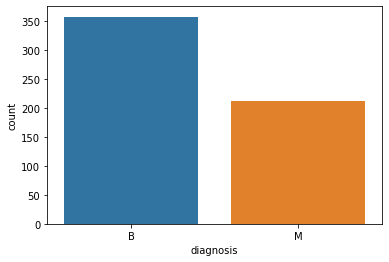

In [8]:
# Let's visualize the count
sns.countplot(df['diagnosis'], label = 'count')

In [9]:
# Check the datatypes of all the features to see which one's need encoding
df.dtypes

id                     int64
diagnosis             object
radius_mean          float64
texture_mean         float64
perimeter_mean       float64
area_mean            float64
smoothness_mean      float64
compactness_mean     float64
concavity_mean       float64
points_mean          float64
symmetry_mean        float64
dimension_mean       float64
radius_se            float64
texture_se           float64
perimeter_se         float64
area_se              float64
smoothness_se        float64
compactness_se       float64
concavity_se         float64
points_se            float64
symmetry_se          float64
dimension_se         float64
radius_worst         float64
texture_worst        float64
perimeter_worst      float64
area_worst           float64
smoothness_worst     float64
compactness_worst    float64
concavity_worst      float64
points_worst         float64
symmetry_worst       float64
dimension_worst      float64
dtype: object

In [10]:
# Let's encode the categorical column 'diagnosis' LabelEncoding
from sklearn.preprocessing import LabelEncoder

In [11]:
labelencoder_y = LabelEncoder()
df.iloc[:,1] = labelencoder_y.fit_transform(df.iloc[:,1].values)
df.iloc[:,1]

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    1
567    0
568    1
Name: diagnosis, Length: 569, dtype: int32

In [13]:
# Let's check our dataframe and verify if it has changed the categorical fetaure
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,0,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,0,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


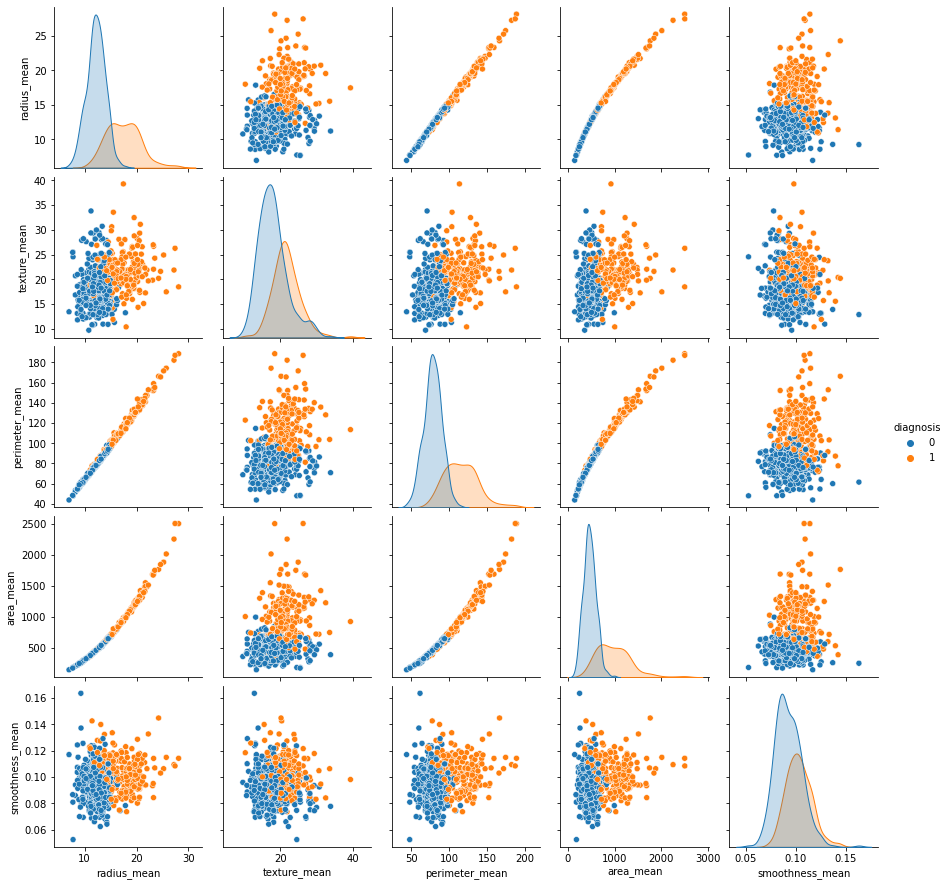

In [14]:
# Create a pairplot
sns.pairplot(df.iloc[:,1:7], hue='diagnosis')

# Print the first 5 rows of new cleaner data

In [15]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,0,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,0,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [144]:
# Get the correlation of columns
df_corr = df.iloc[:,1:].corr() 
df_corr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<AxesSubplot:>

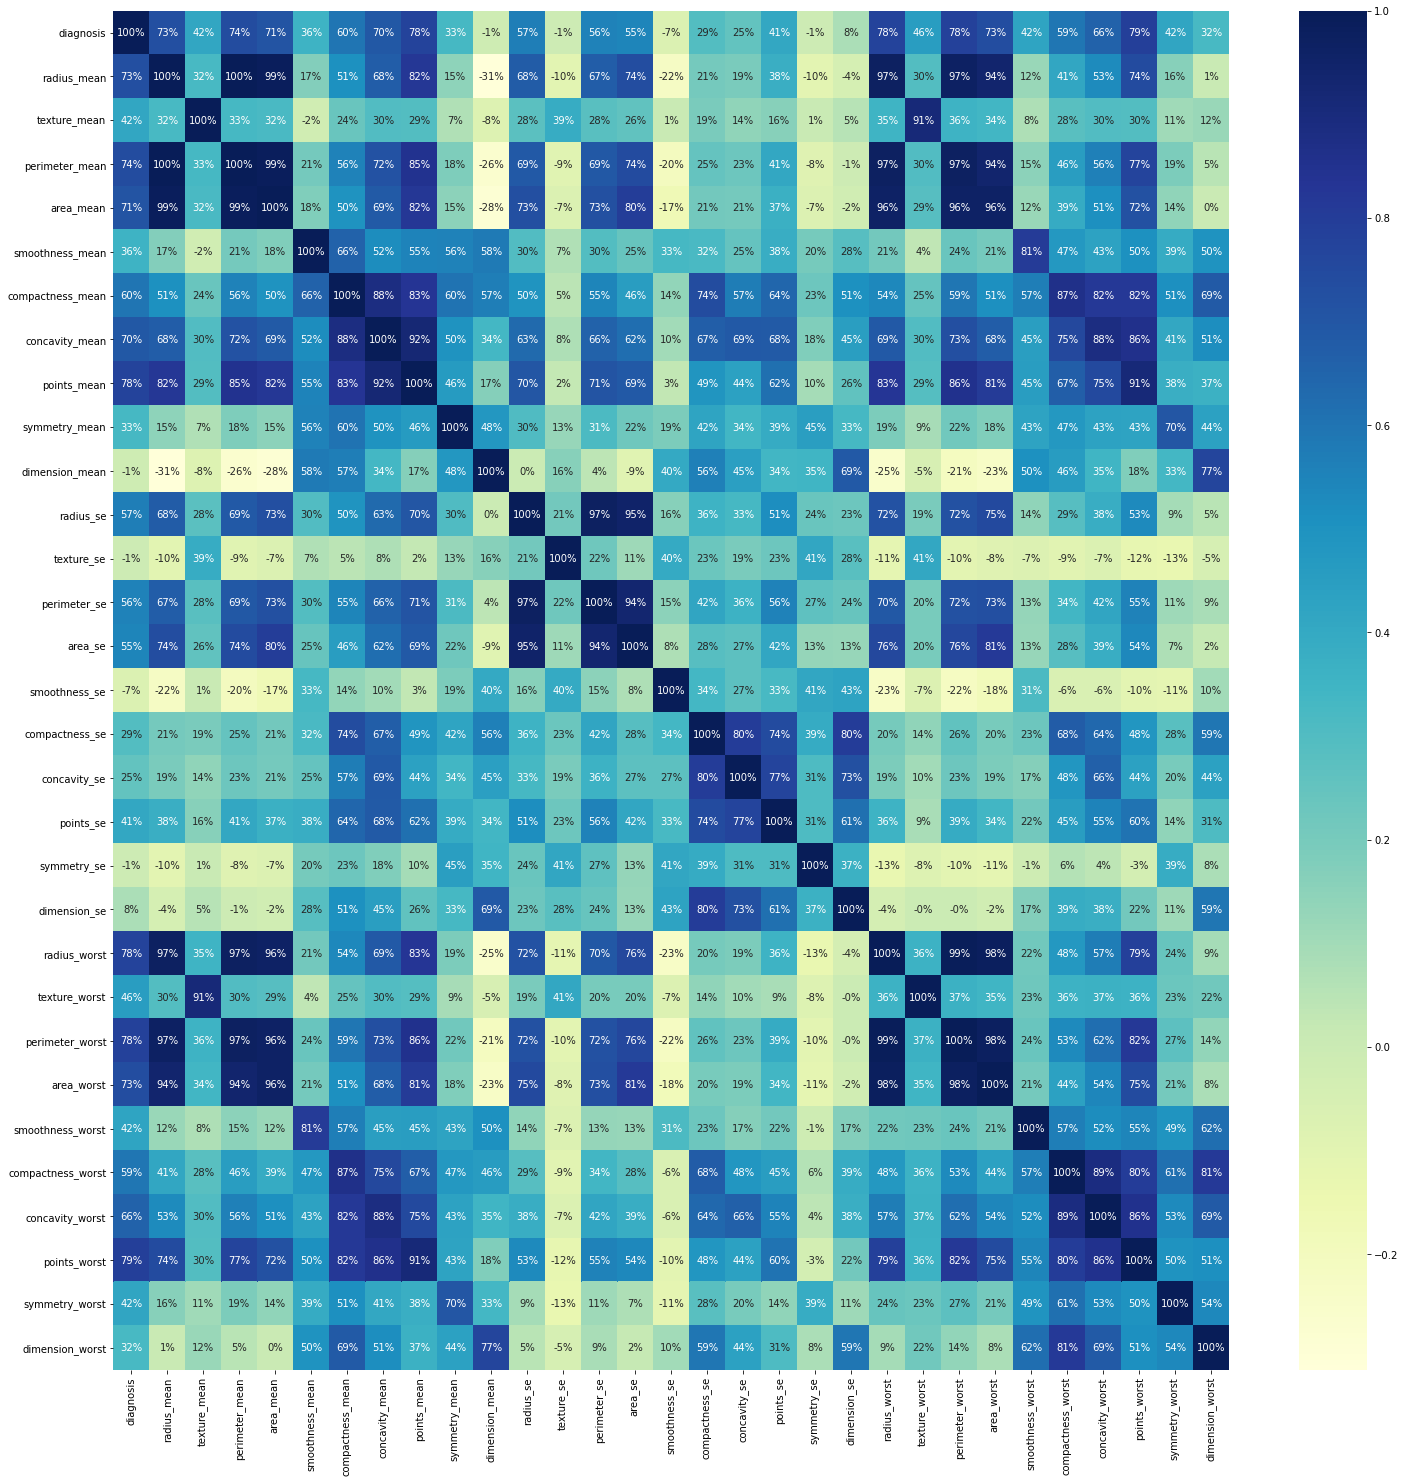

In [145]:
# Visualize the correlation
plt.figure(figsize=(25,25))
sns.heatmap(df_corr, annot = True, fmt='.0%',  cmap="YlGnBu")

### Step 4: Modelling

In [16]:
# Create the labels x(independent) and y(dependent) from dataset.
x = df.iloc[:,2:31].values
y = df.iloc[:,1].values

In [17]:
# Type of the x and y will be an array, earlier the type was a pandas dataframe
type(x)

numpy.ndarray

In [18]:
x

array([[1.232e+01, 1.239e+01, 7.885e+01, ..., 1.242e-01, 9.391e-02,
        2.827e-01],
       [1.060e+01, 1.895e+01, 6.928e+01, ..., 1.916e-01, 7.926e-02,
        2.940e-01],
       [1.104e+01, 1.683e+01, 7.092e+01, ..., 1.067e-01, 7.431e-02,
        2.998e-01],
       ...,
       [1.528e+01, 2.241e+01, 9.892e+01, ..., 3.630e-01, 1.226e-01,
        3.175e-01],
       [1.453e+01, 1.398e+01, 9.386e+01, ..., 1.373e-01, 1.069e-01,
        2.606e-01],
       [2.137e+01, 1.510e+01, 1.413e+02, ..., 4.024e-01, 1.966e-01,
        2.730e-01]])

In [19]:
# Split the data into train(75%) and test(255) sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [20]:
# Let's scale the data. Feature-scaling or normalization

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

* Now we've got our data split into training and test sets, it's time to build a machine learning model.
We'll train it(find patterns) on training set.
And we'll test it (use patterns) on the test set.

* We're going to try 3 different ML models:
1. LogisticRegression
2. Decision Tree Classifier
3. Random ForestClassifier

In [21]:
# Put all the models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
         'Decision Tree Classifier': DecisionTreeClassifier(),
         'Random Forest Classifier': RandomForestClassifier()}

# Createe a function to fit and score models
def fit_and_Score (models, x_train, y_train, x_test, y_test):
    """
    Fits and evaluates deifferent calssification models using training and tset data.
    """
    # Setup a random seed
    np.random.seed(42)
    # Dictionary to keep model scores
    model_scores = {}
    # Iterate and Fit all the models
    for name, model in models.items():
        # fit the model
        model.fit(x_train, y_train)
        # Get teh scores in a dictionary
        model_scores[name] = model.score(x_test, y_test)
    return model_scores
        

In [22]:
model_scores = fit_and_Score(models, x_train, y_train, x_test, y_test)
model_scores

{'Logistic Regression': 0.965034965034965,
 'Decision Tree Classifier': 0.916083916083916,
 'Random Forest Classifier': 0.9300699300699301}

In [136]:
# Other metrics for models
for name, model in models.items():
    print(name)
    print("Classification Report: \n", classification_report(y_test, model.predict(x_test)))
    print("Accuracy Score: ", accuracy_score(y_test, model.predict(x_test)))
    print("________________________________________________________________________________")

Logistic Regression
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97        93
           1       0.92      0.98      0.95        50

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143

Accuracy Score:  0.965034965034965
________________________________________________________________________________
Decision Tree Classifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.91      0.93        93
           1       0.85      0.92      0.88        50

    accuracy                           0.92       143
   macro avg       0.90      0.92      0.91       143
weighted avg       0.92      0.92      0.92       143

Accuracy Score:  0.916083916083916
________________________________________________________________________________
Random Forest Class

### Baseline Models Comparison

In [138]:
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])
model_compare

,Logistic Regression,Decision Tree Classifier,Random Forest Classifier
Accuracy,0.965035,0.916084,0.93007


<Figure size 720x720 with 0 Axes>

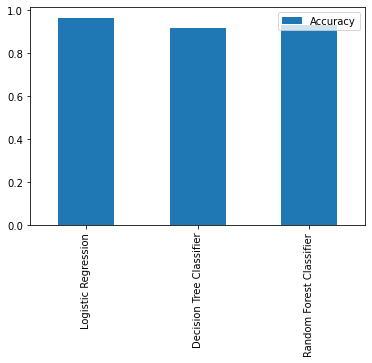

In [139]:
# Visual view of models accuracy
plt.figure(figsize=(10,10))

model_compare.T.plot.bar();

### Analysis:

* As we have got our Baseline model accuracy values, we can see that Logistic Regression and RandomForestClassifier models  have performed well. 

* We will further tune both the model's hyperparameters and select the one with best results.

## Hyperparameter Tuning

* The 2 commonly used techniques for hyperparameter tuning:
  1. RandomizedSearchCv : 
  2. GridSearchCV


### Logistic Regression model Hyperparameter-tuning

In [140]:
## RandomizedSearchCV

# Create grid for randomizedsearchcv
model = LogisticRegression()
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none', 'l1', 'l2', 'elasticnet']
C = [100, 10, 1.0, 0.1, 0.01, 0.001]
max_iter = [int(x) for x in np.linspace(100, 5000, 10)]
random_grid = {'solver': solver,
              'penalty': penalty,
               'C': C,
              'max_iter': max_iter}

In [141]:
model = LogisticRegression ()

In [36]:
random_cv = RandomizedSearchCV(estimator=model, param_distributions=random_grid, n_iter=100,
                               n_jobs = -1, cv = 10, verbose=4, random_state = 42)

In [37]:
# Fit the model
random_cv.fit(x_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


F:\Data_Science\breast-cancer-detection\env\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.94152824        nan        nan 0.9320598
 0.96251384 0.95066445 0.98117386        nan 0.9320598  0.96949059
 0.96949059 0.84728682 0.9320598  0.95315615 0.96251384        nan
        nan 0.96949059 0.9320598  0.96949059        nan 0.96245847
 0.96245847        nan        nan 0.98117386        nan        nan
 0.96710963 0.95066445 0.98361019 0.95548173        nan        nan
 0.96949059 0.95315615 0.94152824 0.98361019        nan 0.94147287
        nan        nan 0.95066445        nan 0.96710963 0.96949059
 0.96478405 0.96478405        nan        nan 0.96007752 0.95780731
        nan 0.96710963        nan 0.94374308 0.94152824        nan
 0.96245847        nan 0.96710963        nan        nan 0.95066445
 0.95315615        nan 0.96949059 0.98117386        nan        nan
 0.89197121 0.96949059        nan 0

RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01, 0.001],
                                        'max_iter': [100, 644, 1188, 1733, 2277,
                                                     2822, 3366, 3911, 4455,
                                                     5000],
                                        'penalty': ['none', 'l1', 'l2',
                                                    'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, verbose=4)

In [63]:
random_cv.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 2277, 'C': 0.1}

In [64]:
log_reg_best_randomcv = random_cv.best_estimator_
log_reg_best_randomcv

LogisticRegression(C=0.1, max_iter=2277, solver='liblinear')

In [65]:
model.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [66]:
y_preds = log_reg_best_randomcv.predict(x_test)

In [67]:
print('Classification Report: \n',classification_report(y_test, log_reg_best_randomcv.predict(x_test)))
print('Accuracy Score: ', accuracy_score(y_test,log_reg_best_randomcv.predict(x_test)))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98        93
           1       0.96      0.98      0.97        50

    accuracy                           0.98       143
   macro avg       0.97      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

Accuracy Score:  0.9790209790209791


### Logistic Regression Model:
    
* We have got accuracy score as 97.9% for our LogisticRegressionModel

### RandomForestClassifier Model Hyperparameter-tuning
* 1. RandomizedSearchCV:
    

In [45]:
# let's prepare the param_grid for RandomForestClassifier

# Number of trees in RandomForest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Max Number of levels in a tree
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 6, 8 , 10, 14]

# Minimun number of samples required at each leaf-node
min_samples_leaf = [1, 2, 4, 6, 8, 10, 12, 15]

# Create the param_grid now
random_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'max_features': max_features,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'criterion': ['entropy', 'gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [2, 5, 6, 8, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 15], 'criterion': ['entropy', 'gini']}


In [46]:
# Now let's apply RandomisezSearchCV to the RFC model
rf = RandomForestClassifier()
rf_randomcv = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, 
                                 n_iter=100, cv=3, verbose=4, random_state=42, n_jobs=-1)

# Fit the randomizedsearchcv model
rf_randomcv.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 10,
                                                             12, 15],
                                        'min_samples_split': [2, 5, 6, 8, 10,
                                                              14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                  

In [47]:
rf_randomcv.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 780,
 'criterion': 'entropy'}

In [60]:
best_random_grid = rf_randomcv.best_estimator_
best_random_grid

RandomForestClassifier(criterion='entropy', max_depth=780, max_features='sqrt',
                       min_samples_leaf=2, n_estimators=1600)

In [51]:
y_preds = best_random_grid.predict(x_test)
print("Confusion matrix: \n", confusion_matrix(y_test, y_preds))
print("Accuracy Score: ", accuracy_score(y_test, y_preds))
print("Classification Report: \n ", classification_report(y_test, y_preds))

Confusion matrix: 
 [[86  7]
 [ 2 48]]
Accuracy Score:  0.9370629370629371
Classification Report: 
                precision    recall  f1-score   support

           0       0.98      0.92      0.95        93
           1       0.87      0.96      0.91        50

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143



### RandomForestClassifier Model Hyperparameter-tuning
* 2. GridSearchCTheV:

    - Next technique to tune the hyperparameters is to use gridsearchcv. This is an exhaustive search and searches through all the permutations and combinations of the values given for the parameters

In [52]:
# we will take teh best_params obtained from randomized serch into account
rf_randomcv.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 780,
 'criterion': 'entropy'}

In [53]:
# Prepare the param_grid fo rgridsearchcv

param_grid= {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                         rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'],
                         rf_randomcv.best_params_['min_samples_split'] + 1,
                         rf_randomcv.best_params_['min_samples_split'] + 2,
                         ],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'],
                        rf_randomcv.best_params_['min_samples_leaf'] + 2,
                        rf_randomcv.best_params_['min_samples_leaf'] + 4,
                        rf_randomcv.best_params_['min_samples_leaf'] + 1],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'],
                    rf_randomcv.best_params_['n_estimators'] + 200, 
                    rf_randomcv.best_params_['n_estimators'] + 400,
                    rf_randomcv.best_params_['n_estimators'] + 600]
    
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [780], 'max_features': ['sqrt'], 'min_samples_split': [0, 1, 2, 3, 4], 'min_samples_leaf': [2, 4, 6, 3], 'n_estimators': [1600, 1800, 2000, 2200]}


In [54]:
## Fit the gridsearch to the data
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs = -1, verbose=5 )

grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


F:\Data_Science\breast-cancer-detection\env\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.96018826 0.96018826 0.96018826 0.95786268
 0.95786268 0.96251384 0.96018826 0.96251384 0.96251384 0.96251384
 0.96251384 0.96018826        nan        nan        nan        nan
        nan        nan        nan        nan 0.95780731 0.95780731
 0.95548173 0.95780731 0.95780731 0.95548173 0.95548173 0.95780731
 0.95780731 0.95548173 0.95548173 0.95780731        nan        nan
        nan        nan        nan        nan        nan        nan
 0.95542636 0.95310078 0.95310078 0.95548173 0.95310078 0.95542636
 0.95542636 0.95310078 0.95542636 0.95542636 0.95548173 0.95310078
        nan        nan        nan        nan        nan        nan
        nan        nan 0.95780731 0.95780731 0.96018826 0.95780731
 0.96018826 0.96018826 0.96018826 

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [780],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [2, 4, 6, 3],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'n_estimators': [1600, 1800, 2000, 2200]},
             verbose=5)

In [55]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 780,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 1800}

In [95]:
rfc_grid_search = grid_search.best_estimator_

In [96]:
y_preds = rfc_grid_search.predict(x_test)
print("Confusion matrix: \n", confusion_matrix(y_test, y_preds))
print("Accuracy Score: ", accuracy_score(y_test, y_preds))
print("Classification Report: \n", classification_report(y_test, y_preds))

Confusion matrix: 
 [[86  7]
 [ 2 48]]
Accuracy Score:  0.9370629370629371
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        93
           1       0.87      0.96      0.91        50

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143



### Performance metrics for the two models and thier comparison

In [102]:
# Accuracy score, confusion_matrix, Roc_curve
log_reg_y_preds = log_reg_best_randomcv.predict(x_test)
print("Accuracy score for Logistic Regression: ", accuracy_score(y_test,log_reg_y_preds))
print("Confusion matrix: \n", confusion_matrix(y_test, log_reg_y_preds))
print("----------------------------------------------------------------------------------------")
      
# Performance metrics for RFC model
rfc_y_preds = rfc_grid_search.predict(x_test)
print("Accuracy score for RandomForest Classifier: ", accuracy_score(y_test,rfc_y_preds))
print("Confusion matrix: \n", confusion_matrix(y_test, rfc_y_preds))

Accuracy score for Logistic Regression:  0.9790209790209791
Confusion matrix: 
 [[91  2]
 [ 1 49]]
----------------------------------------------------------------------------------------
Accuracy score for RandomForest Classifier:  0.9370629370629371
Confusion matrix: 
 [[86  7]
 [ 2 48]]


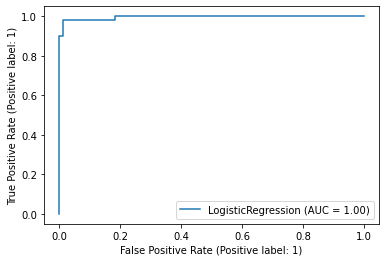

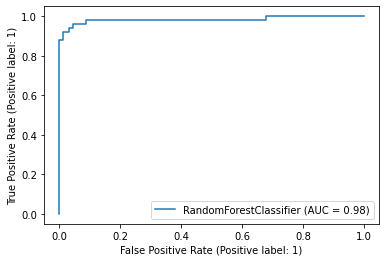

In [103]:
# Plot roc_auc curve
plot_roc_curve(log_reg_best_randomcv,x_test, y_test)

plot_roc_curve(rfc_grid_search, x_test, y_test)

### Calculating evaluation metrics using cross-validation

In [108]:
from sklearn.model_selection import cross_val_score

def cross_val_scores(model, label):
    # Cross-validation accuracy score
    cv_acc = cross_val_score(model, x, y, scoring='accuracy')
    cv_acc = np.mean(cv_acc)
        
    # Cross-validation precision
    cv_precision = cross_val_score(model, x, y, scoring="precision")
    cv_precision = np.mean(cv_precision)
    
    # Cross-validation recall
    cv_recall = cross_val_score(model, x, y, scoring='recall')
    cv_recall = np.mean(cv_recall)
    
    # Cross-validation f1_score
    cv_f1 = cross_val_score(model, x, y, scoring='f1')
    cv_f1 = np.mean(cv_f1)
    
    # Visualize the cross-validates metrics
    cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                 "Precision": cv_precision,
                 "Recall": cv_recall,
                 "F1_score": cv_f1},
                 index=[0])
    cv_metrics.T.plot.bar(title=label, legend=False)
    
    # Display values of performance metrics
    print("Cross Validated Accuarcy: ", cv_acc)
    print("Cross validated precision: ", cv_precision)
    print("Cross Validated Recall:", cv_recall)
    print("Cross Validated F1_score:", cv_f1)

Cross Validated Accuarcy:  0.9420586865393572
Cross validated precision:  0.9416666666666668
Cross Validated Recall: 0.9007751937984496
Cross Validated F1_score: 0.9205799262271924


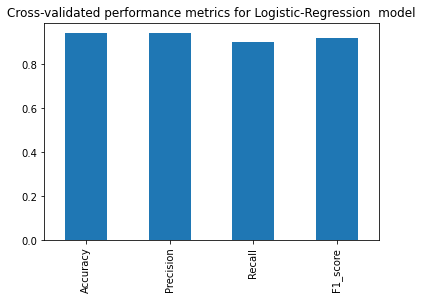

In [110]:
# Logistic Regression model Performance parameters
cross_val_scores(log_reg_best_randomcv, "Cross-validated performance metrics for Logistic-Regression  model")

Cross Validated Accuarcy:  0.9613879832324173
Cross validated precision:  0.9583268079196982
Cross Validated Recall: 0.9338870431893687
Cross Validated F1_score: 0.9470325211644356


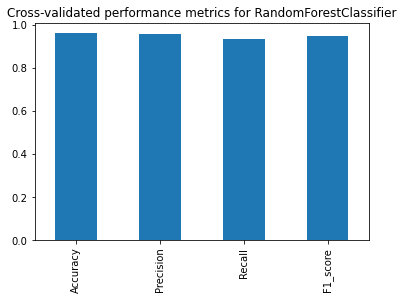

In [111]:
# RandomForest Classifier Performance metrics
cross_val_scores(rfc_grid_search, "Cross-validated performance metrics for RandomForestClassifier")

### Feature Importance: Logistic regression Model

In [85]:
# Get the coefficients of features used inmodelling
log_reg_best_randomcv.coef_

array([[ 0.35811115,  0.40793693,  0.35388041,  0.36686503,  0.12431375,
         0.03298205,  0.34210214,  0.41475902,  0.07185144, -0.12632353,
         0.47258315, -0.09250787,  0.35329452,  0.36817949,  0.07629483,
        -0.21596682, -0.05417828,  0.13535409, -0.09436954, -0.18684945,
         0.50289692,  0.48936079,  0.46772681,  0.47188137,  0.38836822,
         0.19691964,  0.38013878,  0.483638  ,  0.38249206]])

In [129]:
# Match the coef's of features to columns

log_reg_features = dict(zip(df.iloc[:,2:].columns, list(log_reg_best_randomcv.coef_[0])))
log_reg_features

{'radius_mean': 0.3581111501356968,
 'texture_mean': 0.4079369329493383,
 'perimeter_mean': 0.35388040959216316,
 'area_mean': 0.3668650310515173,
 'smoothness_mean': 0.1243137457922997,
 'compactness_mean': 0.032982052962963096,
 'concavity_mean': 0.342102143901813,
 'points_mean': 0.4147590242036785,
 'symmetry_mean': 0.07185143743207752,
 'dimension_mean': -0.12632352677857783,
 'radius_se': 0.47258314837516935,
 'texture_se': -0.09250786602272021,
 'perimeter_se': 0.35329451572558246,
 'area_se': 0.36817949058325133,
 'smoothness_se': 0.07629483430114753,
 'compactness_se': -0.2159668206001262,
 'concavity_se': -0.05417827542378038,
 'points_se': 0.13535408605765648,
 'symmetry_se': -0.09436953686518303,
 'dimension_se': -0.18684945018819385,
 'radius_worst': 0.5028969160669094,
 'texture_worst': 0.48936079252089576,
 'perimeter_worst': 0.46772680828079755,
 'area_worst': 0.47188137146617654,
 'smoothness_worst': 0.38836821952564693,
 'compactness_worst': 0.19691964438456214,
 'con

<AxesSubplot:title={'center':'Feature Importance for Logistic Regression'}>

<Figure size 2160x1440 with 0 Axes>

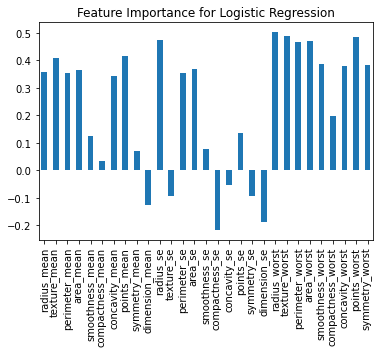

In [134]:
# Visualize the feature-importance

log_reg_features_df = pd.DataFrame(log_reg_features, index=[0])
plt.figure(figsize=(30,20))
log_reg_features_df.T.plot.bar(title="Feature Importance for Logistic Regression", legend=False)

### Feature Importance: RandomForest Classifier

In [124]:
# RFC model
rfc_grid_search.feature_importances_

array([0.03479993, 0.0161195 , 0.04973711, 0.04352903, 0.00703035,
       0.01512188, 0.04419945, 0.09563858, 0.00433574, 0.00455416,
       0.01363347, 0.0039463 , 0.01167734, 0.03809941, 0.00448063,
       0.00458747, 0.00496307, 0.00573471, 0.00516913, 0.00592748,
       0.11119837, 0.01785252, 0.1243567 , 0.11231522, 0.01468758,
       0.01700534, 0.0399737 , 0.13514496, 0.01418089])

In [126]:
# Match the coef's of features to columns

rfc_features = dict(zip(df.iloc[:,2:].columns, list(rfc_grid_search.feature_importances_)))
rfc_features

{'radius_mean': 0.03479992709773673,
 'texture_mean': 0.01611949934130175,
 'perimeter_mean': 0.04973710924504974,
 'area_mean': 0.04352903082937024,
 'smoothness_mean': 0.00703035156526141,
 'compactness_mean': 0.015121877644531177,
 'concavity_mean': 0.04419944722079736,
 'points_mean': 0.09563858183456712,
 'symmetry_mean': 0.0043357405400708034,
 'dimension_mean': 0.0045541553164275324,
 'radius_se': 0.013633466360924378,
 'texture_se': 0.003946299544881133,
 'perimeter_se': 0.01167733971277444,
 'area_se': 0.03809940675179587,
 'smoothness_se': 0.00448063269981621,
 'compactness_se': 0.004587469244378091,
 'concavity_se': 0.004963068660447786,
 'points_se': 0.0057347053720743545,
 'symmetry_se': 0.005169128737664647,
 'dimension_se': 0.005927483248216694,
 'radius_worst': 0.11119836632471099,
 'texture_worst': 0.017852523302505273,
 'perimeter_worst': 0.12435670015122745,
 'area_worst': 0.11231521648097934,
 'smoothness_worst': 0.014687582302967067,
 'compactness_worst': 0.0170053

<AxesSubplot:title={'center':'Feature Importance for RandomForest Classifier'}>

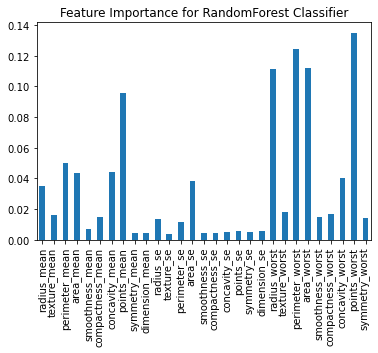

In [135]:
# Visualisation of feature importance
rfc_features_df = pd.DataFrame(rfc_features, index=[0])
rfc_features_df.T.plot.bar(title="Feature Importance for RandomForest Classifier", legend=False)

### The 2 models have a reasonable accuracy score. 
* 1.LogisticRegression: 94.20%
* 2.RandomForest Classifier: 96.13%